In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

#### Load and Preview Excel Data ####

First, we start off by loading the two sheets for transactions CY 2009 and CY 2010 into Dataframes and observe what the data looks like

In [44]:
file_path = '../sample_data/transaction_data.xlsx'
transaction_data = pd.read_excel(file_path, sheet_name= None)
transaction_data.keys()

dict_keys(['Year 2009-2010', 'Year 2010-2011'])

In [45]:
transactions_2009 = transaction_data['Year 2009-2010']
print(f"Transactions from {transactions_2009['InvoiceDate'].min()} -> {transactions_2009['InvoiceDate'].max()}")
transactions_2009.head()

Transactions from 2009-12-01 07:45:00 -> 2010-12-09 20:01:00


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [46]:
transactions_2010 = transaction_data['Year 2010-2011']
print(f"Transactions from {transactions_2010['InvoiceDate'].min()} -> {transactions_2010['InvoiceDate'].max()}")
transactions_2010.head()

Transactions from 2010-12-01 08:26:00 -> 2011-12-09 12:50:00


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Merge Data and Remove Duplicates ####

We observe that 2009-2010 transactions contain records uptill 9th Dec 2010, while 2010-2011 transactions records start from 1st Dec 2010. This indicates that there may be an overlap between the two Dataframes.

To simplify analysis and maintain data integrity, we will first merge the data and then remove duplicates


In [54]:
transactions_df = pd.concat([transactions_2009, transactions_2010])
print(f"Number of rows before removing duplicates: {transactions_df.shape[0]}")

transactions_df = transactions_df.drop_duplicates()
print(f"Number of rows after removing duplicates: {transactions_df.shape[0]}")


Number of rows before removing duplicates: 1067371
Number of rows after removing duplicates: 1033036


#### Monthly Order Metrics ####

Now, since we have a single Dataframe with all our data, we want to take a look at some Monthly Order Metrics.
* Number of Orders per Month (Count of Unique Invoices)
* Number of Active Customers per month (Customers with at least one Invoice in a given month)
* Monthly Revenue

In [56]:
# Create a YearMonth column to aggregate data by Month and Year
transactions_df['InvoiceDate'] = pd.to_datetime(transactions_df['InvoiceDate'])
transactions_df['YearMonth'] = transactions_df['InvoiceDate'].dt.strftime('%Y-%m')

# Calculate Order Item level Revenue Data 
transactions_df['OrderRevenue'] = transactions_df['Quantity'] * transactions_df['Price']

# Aggregate the data to get monthly unique invoices and active customers from 2009-2010
monthly_metrics = transactions_df.groupby('YearMonth').agg(
    active_customers = ('Customer ID', 'nunique'),
    orders_placed = ('Invoice', 'nunique'),
    revenue = ('OrderRevenue', 'sum')
).reset_index()

monthly_metrics.head()

,YearMonth,active_customers,orders_placed,revenue
0,2009-12,1045,2330,796648.500
1,2010-01,786,1633,622479.502
2,2010-02,807,1969,531265.366
3,2010-03,1111,2367,763247.241
4,2010-04,998,1892,587926.692


#### Revenue Over Time ####

Now, we want to take a look at month-to-month changes in Order Revenue, and how these changes compare across the two Calendar Years

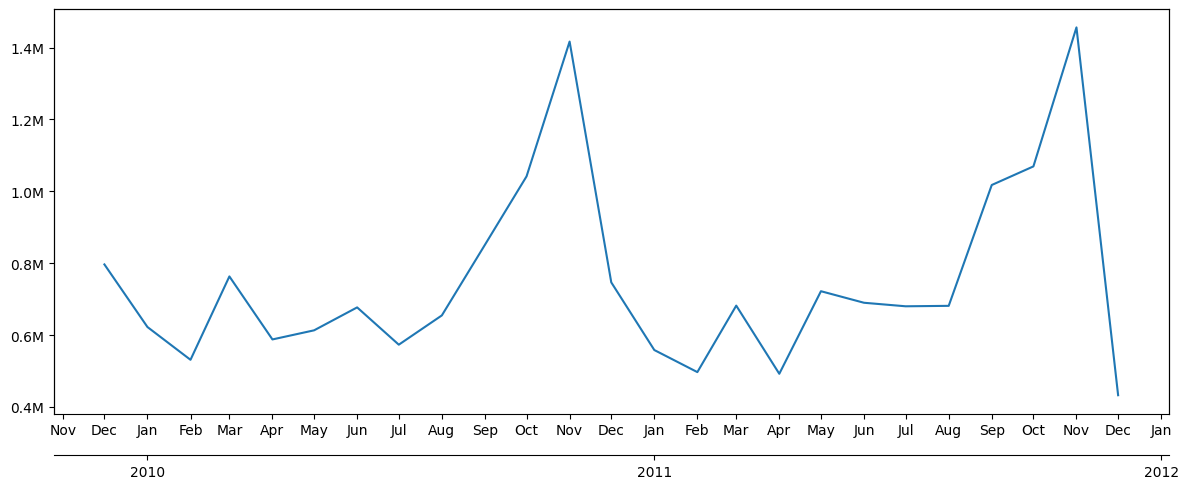

In [78]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(monthly_metrics['YearMonth'], monthly_metrics['revenue'])

# Formatting the x-axis  
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Creating a secondary x-axis for the year
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

# Formatting the secondary x-axis
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensuring the secondary x-axis is positioned below the primary x-axis
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('outward', 30))

# Formatting the y-axis units
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()